In [3]:
import numpy as np
import umap
from fbpca import pca
from ipywidgets import interact, interact_manual
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.metrics import pairwise_distances
from heapq import nlargest
from scipy.stats import spearmanr, pearsonr

In [4]:
import warnings
import os
warnings.simplefilter('ignore')

os.chdir('/Users/bdemeo/Documents/bergerlab/lsh/ample/bin')
from datatools import *
from dataset import *

os.chdir('/Users/bdemeo/Documents/bergerlab/lsh/ample')

In [5]:
import csv
import os
from sklearn import preprocessing

def open_data(NAMESPACE, parent_dir='data/', delimiter = '\t', dimred=True, annos = []):

    filename = 'dimred' if dimred else 'full'
    with open(parent_dir+NAMESPACE+'/'+filename+'.txt') as f:
        reader = csv.reader(f, delimiter = delimiter)
        data = np.array(list(reader)).astype(float) #assumes clean data, no column names

    result = dataset(data, path=parent_dir+NAMESPACE+'/')


    for anno in annos: #search for the indicated annotation file
        if os.path.exists(parent_dir+NAMESPACE+'/'+anno+'.txt'):
            with open(parent_dir+NAMESPACE+'/'+anno+'.txt') as f:
                reader = csv.reader(f, delimiter = delimiter)
                labels = np.array(list(reader))
                labels = [x[0] for x in labels]
                result.data[anno] = labels
        else:
            print('WARNING: could not find annotation {}'.format(anno))


    #search for subsamples
    if os.path.exists(parent_dir+NAMESPACE+'/ft.txt'):
        result.load_subsample(parent_dir+NAMESPACE+'/ft.txt', name='ft', delimiter=delimiter)


    return(result)


In [6]:
def top_diffs(k=1):
    def F(x,y):
        diffs = np.absolute(np.array(x)-np.array(y))
        #print(diffs)
        topdiffs = nlargest(k, diffs)
        return(np.linalg.norm(topdiffs))
    return(F)
    

In [7]:
def spearman(x,y):
    return 1/spearmanr(np.array(x),np.array(y)).correlation

In [21]:
def pearson(x,y): #negative pearson correlation
    return ((pearsonr(np.array(x),np.array(y))[0]+1)/2)

In [17]:
def euclidean_i(x,y):
    return -1*(np.linalg.norm(np.array(x)-np.array(y)))

In [9]:
pearson([1,2,3],[1,2,3])

0.0

In [10]:
def trunc_euclidean(k=5):
    def F(x,y):
        return np.linalg.norm(np.array(x)[:k]-np.array(y)[:k])
    
    return(F)
    

In [11]:
zheng = open_data('zheng', annos=['patients','labels'])

In [12]:
zheng_sub = zheng.subset('patients','P1116')

In [13]:
zheng_sub.sort_values('labels')

computing distances...


array([[  -0.        , -116.90941977, -101.96065815, ..., -121.28127219,
        -134.39397682, -134.16197697],
       [-116.90941977,   -0.        ,  -80.95222101, ..., -104.04922724,
        -139.79773252, -151.69253155],
       [-101.96065815,  -80.95222101,   -0.        , ..., -106.58770696,
        -145.79620473, -146.18120695],
       ...,
       [-121.28127219, -104.04922724, -106.58770696, ...,   -0.        ,
        -138.93906234, -144.2205983 ],
       [-134.39397682, -139.79773252, -145.79620473, ..., -138.93906234,
          -0.        , -112.33339123],
       [-134.16197697, -151.69253155, -146.18120695, ..., -144.2205983 ,
        -112.33339123,   -0.        ]])

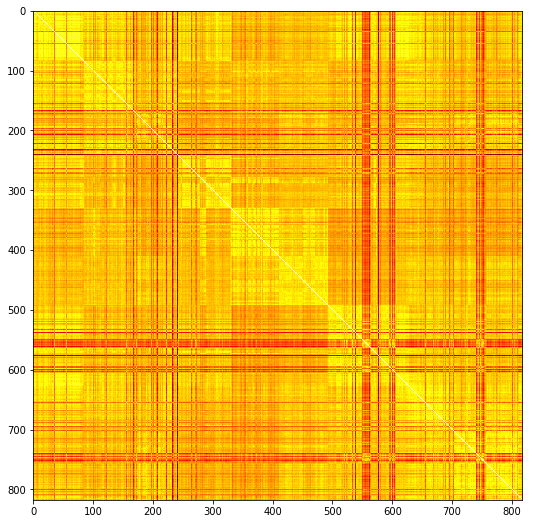

In [19]:
zheng_sub.heatmap(metric=euclidean_i)

computing distances...


array([[1.        , 0.58241093, 0.68447903, ..., 0.57440627, 0.52267083,
        0.5531802 ],
       [0.58241093, 1.        , 0.78241836, ..., 0.65887038, 0.43559263,
        0.38125993],
       [0.68447903, 0.78241836, 1.        , ..., 0.64450661, 0.39041856,
        0.42994911],
       ...,
       [0.57440627, 0.65887038, 0.64450661, ..., 1.        , 0.46917985,
        0.46780009],
       [0.52267083, 0.43559263, 0.39041856, ..., 0.46917985, 1.        ,
        0.7000511 ],
       [0.5531802 , 0.38125993, 0.42994911, ..., 0.46780009, 0.7000511 ,
        1.        ]])

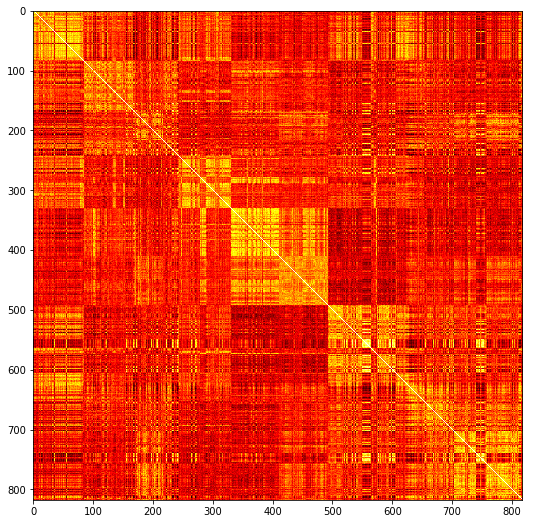

In [22]:
zheng_sub.heatmap(metric=pearson)

In [25]:
labs = list(zheng_sub.data['labels'])
zheng_true = [[labs[x]==y for x in range(len(labs))] for y in labs]

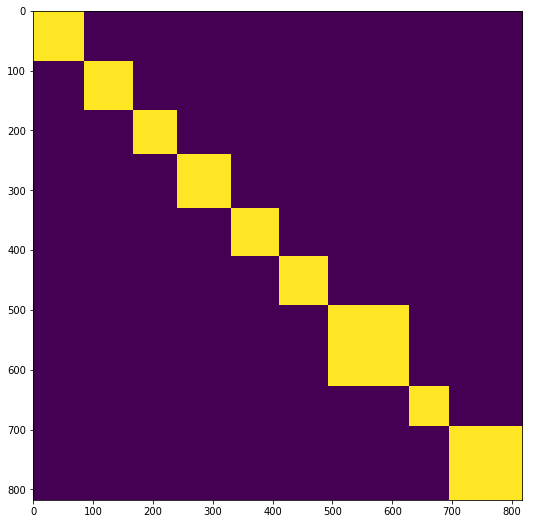

In [26]:
plt.imshow(zheng_true)

In [42]:
dists = pairwise_distances(zheng_sub.data.values[:,:zheng_sub.numFeatures], metric=pearson)
#zheng_sub.heatmap(pearson)

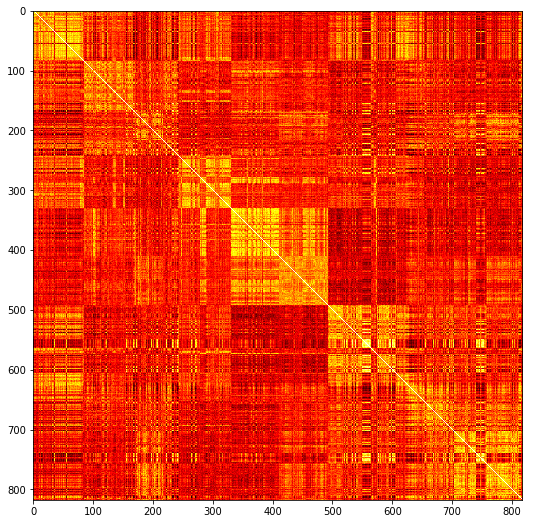

In [43]:
plt.imshow(dists, cmap='hot')

In [23]:
zheng_sub.data['labels']

1490    NTC
791     NTC
792     NTC
793     NTC
794     NTC
795     NTC
796     NTC
797     NTC
798     NTC
799     NTC
1523    NTC
1522    NTC
1521    NTC
1520    NTC
1519    NTC
1518    NTC
790     NTC
789     NTC
788     NTC
787     NTC
1528    NTC
1527    NTC
1526    NTC
1525    NTC
1524    NTC
776     NTC
777     NTC
1514    NTC
778     NTC
780     NTC
       ... 
3010    TTR
3033    TTR
3032    TTR
3031    TTR
3030    TTR
3029    TTR
3028    TTR
3027    TTR
3026    TTR
3025    TTR
3024    TTR
3023    TTR
3022    TTR
3021    TTR
3020    TTR
3019    TTR
3018    TTR
3017    TTR
3016    TTR
3015    TTR
3014    TTR
3013    TTR
3012    TTR
3011    TTR
3756    TTR
3755    TTR
3754    TTR
3753    TTR
3009    TTR
3067    TTR
Name: labels, Length: 818, dtype: object

computing distances...


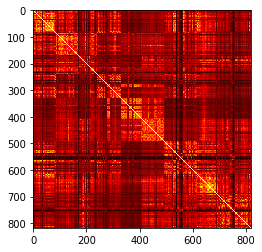

In [130]:
zheng_sub.heatmap(top_diffs(2))

computing distances...


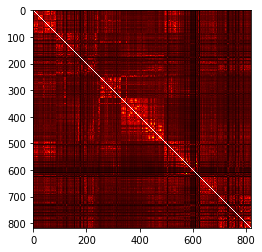

In [121]:
zheng_sub.heatmap(trunc_euclidean(20))

computing distances...


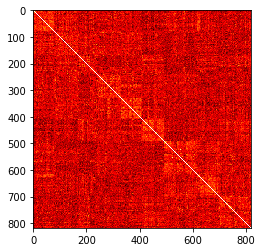

In [108]:
zheng_sub.heatmap(spearman)

In [13]:
pbmc = open_data('pbmc',annos=['labels'])
pbmc = pbmc.subsamples['ft']

In [14]:
pbmc.data = pbmc.data.iloc[:200,:]

In [15]:
pbmc.sort_values('labels')

In [16]:
pbmc.save('ft_200')

In [17]:
pbmc.grow()

making embedding
embedding size 20000
(200, 3)


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMDAsIGRlc2NyaXB0aW9uPXUnTicsIG1heD0yMDAsIG1pbj0xKSwgRHJvcGRvd24oZGVzY3JpcHRpb249dSdjb2xvcicsIG/igKY=


computing distances...


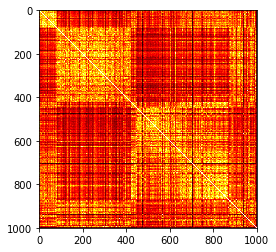

In [22]:
pbmc.heatmap()

computing distances...


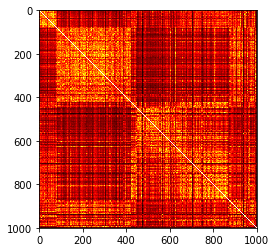

In [23]:
pbmc.heatmap(top_diffs(10))

In [1]:
pbmc.heatmap(trunc_euclidean(10))

NameError: name 'pbmc' is not defined